# Business Problem
The flight ticket price in India is based on demand and supply model with few restrictions on pricing from regulatory bodies. It is often perceived as unpredictable and , recent dynamic pricing scheme added to the confusion. 
The objective is to create a machine learning model for predicting the flight price, based on historical data, which can be used for reference price for customers as well as airline service providers

# Goal
Creating a machine learning for predicting flight ticket price with high accuracy. 

# Imports
** Import pandas, numpy, matplotlib,and seaborn.(we will import sklearn as we need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
flights=pd.read_excel('C:\\Users\\Mani Teja\\Downloads\\Airlines poject\\Data_Train.xlsx')

*Check the Head of the flights and also info() methods

In [4]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis
Let's explore the data!

**As you can see in the info that all the columns in the dataframe except for the price are in string format so we need to convert our required column in to the appropriate one.

In [6]:
#clearing the missing data
flights.dropna(inplace=True)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

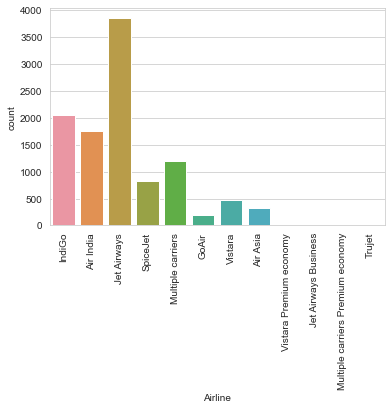

In [7]:
#Now lets check the count of the airlines in the visual graph
plot=plt.figure()
sns.countplot('Airline',data=flights)
plt.xticks(rotation=90)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

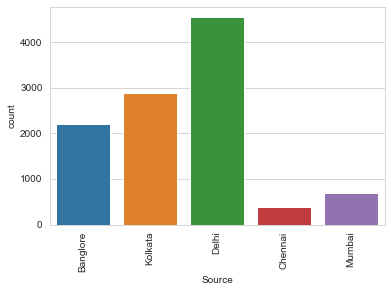

In [8]:
#Now lets check the count of the Source in the visual graph
plot=plt.figure()
sns.countplot('Source',data=flights)
plt.xticks(rotation=90)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

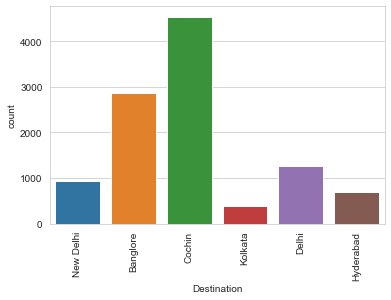

In [9]:
#Now lets check the count of the Destination in the visual graph
plot=plt.figure()
sns.countplot('Destination',data=flights)
plt.xticks(rotation=90)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

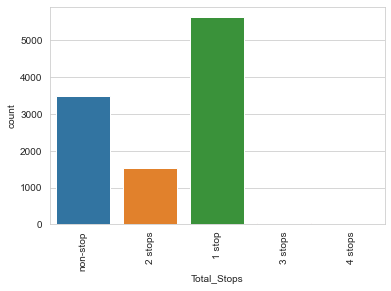

In [10]:
#Now lets check the count of the Total_Stops in the visual graph
plot=plt.figure()
sns.countplot('Total_Stops',data=flights)
plt.xticks(rotation=90)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

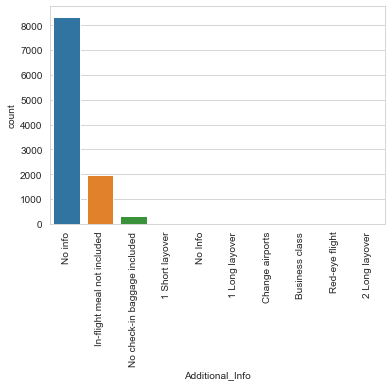

In [11]:
#Now lets check the count of the Additional_info in the visual graph
plot=plt.figure()
sns.countplot('Additional_Info',data=flights)
plt.xticks(rotation=90)

In [12]:
flights['Date_of_Journey']=pd.to_datetime(flights['Date_of_Journey'])
flights['Dep_Time']=pd.to_datetime(flights['Dep_Time'],format='%H:%M').dt.time

In [13]:
#As we can see that there are two 'no_info' columns we combine them
flights['Additional_Info']=flights['Additional_Info'].str.replace('No info','No Info')

In [14]:
#For the duration column which is in a hour and min format lets convert it into minutes using a equation 
flights['Duration']=flights['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
flights['Duration']=pd.to_numeric(flights['Duration'])

In [15]:
#we are converting the flights day to find which day it is in the week and storing it in the weekday column
flights['weekday']=flights[['Date_of_Journey']].apply(lambda x:x.dt.day_name())

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='Price'>

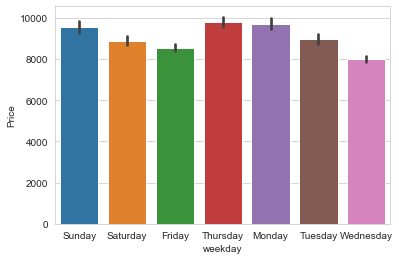

In [16]:
#now lets check the day of the journey relation with the output price column
sns.barplot('weekday','Price',data=flights)

In [17]:
#we are converting the flights date to find which month it is and storing it in the month column
flights["month"] = flights['Date_of_Journey'].map(lambda x: x.month_name())

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Price'>

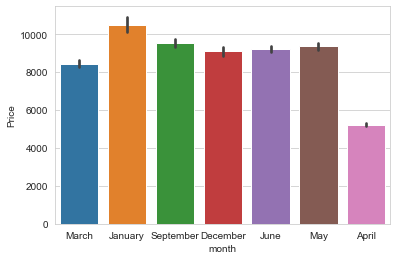

In [18]:
#now lets check the month of journey relation with the output price column
sns.barplot('month','Price',data=flights)

In [19]:
# we are taking the departure time hour column and converting it into a numeric
flights['Dep_Time']=flights['Dep_Time'].apply(lambda x:x.hour)
flights['Dep_Time']=pd.to_numeric(flights['Dep_Time'])

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

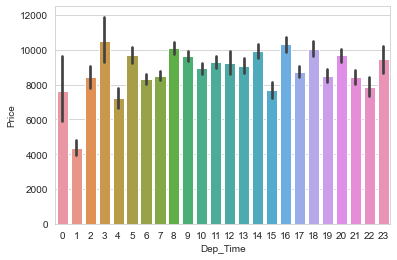

In [20]:
#now lets check the departure time relation with the output price column
sns.barplot('Dep_Time','Price',data=flights)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

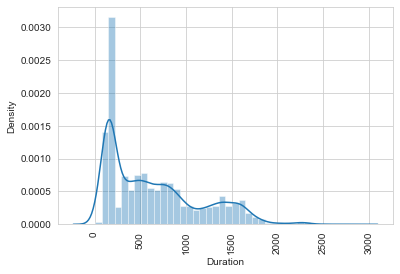

In [21]:
#Now lets check this Duration column in a histogram
plot=plt.figure()
sns.distplot(flights['Duration'],bins=40)
plt.xticks(rotation=90)

In [22]:
flights['Duration']=np.log(flights['Duration'])

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

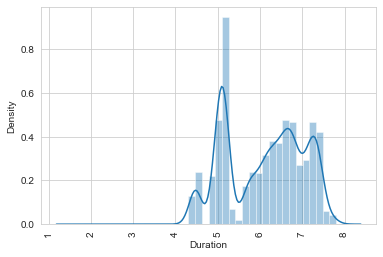

In [23]:
plot=plt.figure()
sns.distplot(flights['Duration'],bins=40)
plt.xticks(rotation=90)

In [24]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,01:10 22 Mar,5.135798,non-stop,No Info,3897,Sunday,March
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13:15,6.098074,2 stops,No Info,7662,Saturday,January
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,9,04:25 10 Jun,7.038784,2 stops,No Info,13882,Friday,September
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18,23:30,5.783825,1 stop,No Info,6218,Thursday,December
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16,21:35,5.652489,1 stop,No Info,13302,Thursday,January


In [25]:
#Now lets remove the irrelevant features
flights.drop(['Route','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)

In [26]:
flights.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,Banglore,New Delhi,22,5.135798,non-stop,No Info,3897,Sunday,March
1,Air India,Kolkata,Banglore,5,6.098074,2 stops,No Info,7662,Saturday,January
2,Jet Airways,Delhi,Cochin,9,7.038784,2 stops,No Info,13882,Friday,September
3,IndiGo,Kolkata,Banglore,18,5.783825,1 stop,No Info,6218,Thursday,December
4,IndiGo,Banglore,New Delhi,16,5.652489,1 stop,No Info,13302,Thursday,January


In [27]:
#Now lets encode the inputs using label encoder
from sklearn.preprocessing import LabelEncoder
var_mod = ['Airline','Source','Destination','Additional_Info','Total_Stops','weekday','month','Dep_Time']
le = LabelEncoder()
for i in var_mod:
    flights[i] = le.fit_transform(flights[i])

In [28]:
flights.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,3,0,5,22,5.135798,4,6,3897,3,4
1,1,3,0,5,6.098074,1,6,7662,2,2
2,4,2,1,9,7.038784,1,6,13882,0,6
3,3,3,0,18,5.783825,0,6,6218,4,1
4,3,0,5,16,5.652489,0,6,13302,4,2


# Assigning Input and output variables

In [29]:
x=flights.drop('Price',axis=1)#taking all the other columns except price 
y=flights['Price']

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#We are splitting the data in to two parts one is used to train the model and another is used to evaluate the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Building a model
** Importing the required regressions

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Defining the RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)

In [34]:
# Training the model
rfr.fit(x_train,y_train)

RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

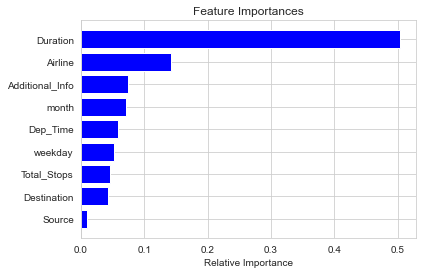

In [35]:
# In random forest we have a method to determine the feature importance in accordance with the relevance of the data
# lets check that once
features=x.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

** Now we can predict the data

In [36]:
predictions=rfr.predict(x_test)

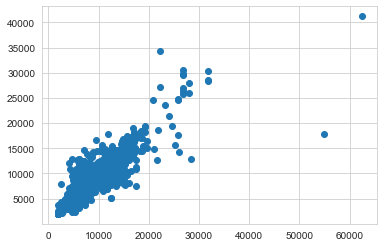

In [37]:
plt.scatter(y_test,predictions)

# Regression Evaluation Metrics

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', (metrics.r2_score(y_test, predictions)))

MAE: 997.7899052065544
MSE: 3748324.544525357
RMSE: 1936.0590240293184
r2_score: 0.8274565226268111


# Residual Histogram

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

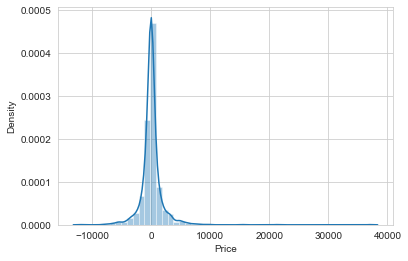

In [40]:
sns.distplot((y_test-predictions),bins=50)

**Applying Different regressions to check the r2_score to see which one is appropriate

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [42]:
from sklearn.metrics import r2_score,make_scorer

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
regg=[LinearRegression(),RandomForestRegressor(n_estimators=30),GradientBoostingRegressor(),ExtraTreesRegressor(n_estimators=30),SVR(),DecisionTreeRegressor()]

In [45]:
mean=[]
std=[]
for i in regg:
    cvs=cross_val_score(i,x,y,cv=5,scoring=make_scorer(r2_score),verbose=1,n_jobs=-1)
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [46]:
for i in range(6):
    print(regg[i].__class__.__name__,':',mean[i])

LinearRegression : 0.4127322917031381
RandomForestRegressor : 0.8061285786137409
GradientBoostingRegressor : 0.7612641386213883
ExtraTreesRegressor : 0.8080537308377673
SVR : 0.009995268587571226
DecisionTreeRegressor : 0.6869467599469651


**From this we can infer that Random Forest regressor is giving the highest R2_score so lets test our data with Random Forest regressor

# Applying the regressions on a new test data file

In [47]:
test_file=pd.read_excel('Test_set.xlsx')

In [48]:
test_file.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


**Converting the dataframe in to our 

In [50]:
test_file['Date_of_Journey']=pd.to_datetime(test_file['Date_of_Journey'])
test_file['Dep_Time']=pd.to_datetime(test_file['Dep_Time'],format='%H:%M').dt.time
test_file['Duration']=test_file['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_file['Duration']=pd.to_numeric(test_file['Duration'])
test_file['Dep_Time']=test_file['Dep_Time'].apply(lambda x:x.hour)
test_file['Dep_Time']=pd.to_numeric(test_file['Dep_Time'])
test_file["month"] = test_file['Date_of_Journey'].map(lambda x: x.month_name())
test_file['weekday']=test_file[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
test_file['Additional_Info']=test_file['Additional_Info'].str.replace('No info','No Info')
test_file.drop(['Date_of_Journey','Route','Arrival_Time'],axis=1,inplace=True)
for i in var_mod:
    test_file[i]=le.fit_transform(test_file[i])

In [51]:
test_price_predictions=rfr.predict(test_file)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

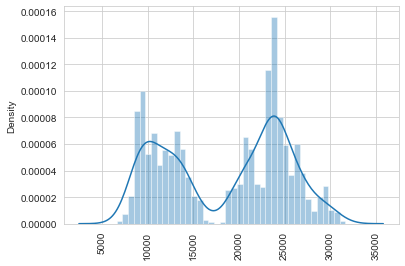

In [52]:
plot=plt.figure()
sns.distplot(test_price_predictions,bins=40)
plt.xticks(rotation=90)

# Conclusion

From the Analysis of the above data set we have predicted the price of a flight in particular to the given features with a accuracy of 82 percent as shown above.